# Import data

In [5]:
import os
import pandas as pd
import numpy as np
from ast import literal_eval
from six.moves import urllib
import json
import requests
import csv

#base_url_path = "https://storage.cloud.google.com/ebap-data/technical-test/data-scientist/"
#Not directly usable, returns an html file instead of a csv

evaluation_ratings_file = "technical-test_data-scientist_evaluation_ratings.csv"
movies_metadata_file = "technical-test_data-scientist_movies_metadata.csv"
ratings_file = "technical-test_data-scientist_ratings.csv"

In [9]:
import csv
import requests

CSV_URL = "https://storage.cloud.google.com/ebap-data/technical-test/data-scientist/technical-test_data-scientist_evaluation_ratings.csv"

with open(os.path.split(CSV_URL)[1], 'wb') as f, \
        requests.get(CSV_URL, stream=True) as r:
    for line in r.iter_lines():
        f.write(line)

<_io.BufferedWriter name='technical-test_data-scientist_evaluation_ratings.csv'>

In [7]:
pd.read_csv(cr)

ValueError: Invalid file path or buffer object type: <class '_csv.reader'>

To be used from a google colab environment

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)
#local_path = 'gdrive/My Drive/ML/Test'

Please define "local path" as your local folder which contain the three datasets for the test

In [9]:
local_path = 'Data'

In [10]:
def load_data(path,filename,dtype=None):
    """
    :param path: path to the csv file
    :param filename: the csv filename ending with .csv extension
    :return: a pandas dataframe
    """
    csv_path = os.path.join(path, filename)
    
    return pd.read_csv(csv_path)

In [11]:
evaluation_ratings = load_data(local_path,evaluation_ratings_file)
movies_metadata = load_data(local_path,movies_metadata_file )
ratings = load_data(local_path,ratings_file)

/Users/thibaultf/.virtualenvs/handsonml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [0]:
def convert_int(x):
    """
    Function used to change a dataframe column type into int64
    """
    try:
        return int(x)
    except:
        return np.nan

In [0]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    """
    Explode a dataframe's array column into rows
    :param df: dataframe with the column to explode
    :param lst_cols: name of the array column to explode
    :param fill_value: the value that will be assigned if an array is empty in one of the rows
    :param preserve_index: indicates if we want to reset the dataframe index or not
    :return: a pandas dataframe with the chose array type column exploded
    """
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [92]:
evaluation_ratings.head()

,userId,movieId
0,1,110
1,1,1968
2,1,4878
3,1,54503
4,1,91542


In [93]:
evaluation_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198034 entries, 0 to 5198033
Data columns (total 2 columns):
userId     int64
movieId    int64
dtypes: int64(2)
memory usage: 79.3 MB


In [94]:
movies_metadata.iloc[0:3].transpose()

,0,1,2
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


In [95]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

We have 45,466 movies

In [96]:
movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [97]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,81834,5.0,1425942133
1,1,112552,5.0,1425941336
2,1,98809,0.5,1425942640
3,1,99114,4.0,1425941667
4,1,858,5.0,1425941523


In [98]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20824175 entries, 0 to 20824174
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 635.5 MB


In [99]:
n_unique_users = ratings.userId.unique().shape[0]
n_unique_users

270896

In [100]:
n_unique_movies_rated = ratings.movieId.unique().shape[0]
n_unique_movies_rated

43331

In [101]:
n_unique_movies = movies_metadata.id.unique().shape[0]
n_unique_movies

45436

Let's check how many users are included in the evaluation file :

In [102]:
n_unique_users_eval = evaluation_ratings.userId.unique().shape[0]
n_unique_users_eval

262202

In [103]:
rating_user_in_eval = ratings[ratings['userId'].isin(evaluation_ratings['userId'])].userId.unique().shape[0]
rating_user_in_eval

262202

There is no "new users" in the evaluation file

# Data exploration

## User's rating

In [20]:
ratings['rating'].describe()

count    2.082418e+07
mean     3.528153e+00
std      1.065369e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

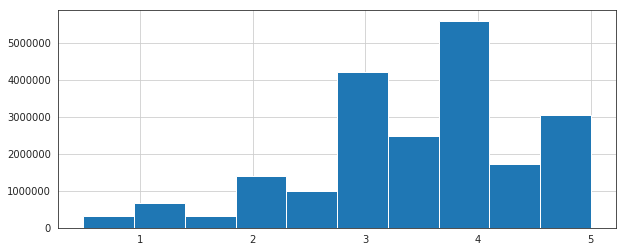

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('white') 
%matplotlib inline 

plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 10) 

In [22]:
ratings.groupby('userId')['rating'].count().describe()

count    270896.000000
mean         76.871475
std         164.569618
min           1.000000
25%          12.000000
50%          24.000000
75%          74.000000
max       14621.000000
Name: rating, dtype: float64

Half of the users made less than 24 movie ratings and one of them rated as much as 14,261 movies

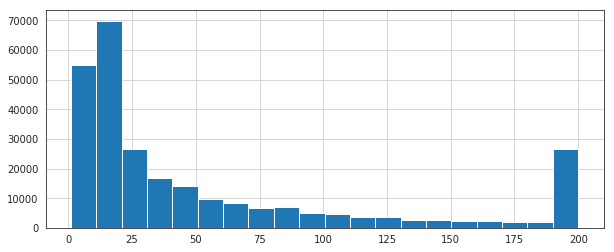

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('white') 
%matplotlib inline 

plt.figure(figsize =(10, 4)) 
  
ratings.groupby('userId')['rating'].count().clip(upper=200).hist(bins = 20) 

# Data preprocessing

## Movies metadata

### Movies id

We want to convert movies_metadata id column into int64 type and to exclude movie with an id that couldn't be converted as such (NaN after using our convert_int function)

In [0]:
movies_metadata['id'] = movies_metadata['id'].apply(convert_int)


In [105]:
movies_metadata[movies_metadata['id'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3 movies need to be excluded here as their data seems to be in the wrong columns and they don't have any id to use them anyway

In [0]:
movies_metadata = movies_metadata[~movies_metadata['id'].isna()]

### Genres

We transform the genres column from the movies metadata from a list of dictionary to a list of genres, the same will be done for the producting company and for the spoken languages

In [0]:
movies_metadata['genres'] = movies_metadata['genres'].fillna('[]').apply(literal_eval).apply(lambda x: list(d['name'] for d in x))

In [108]:
movies_metadata['genres'][:5]

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [111]:
genre_occurences = movies_metadata['genres'].apply(pd.Series).stack().value_counts()
genre_occurences.reset_index()

,index,0
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


### Production companies

In [0]:
movies_metadata['production_companies'] = movies_metadata['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: list(d['name'] for d in x))

In [110]:
production_occurences = movies_metadata['production_companies'].apply(pd.Series).stack().value_counts()
production_occurences.reset_index()

,index,0
0,Warner Bros.,1250
1,Metro-Goldwyn-Mayer (MGM),1076
2,Paramount Pictures,1003
3,Twentieth Century Fox Film Corporation,836
4,Universal Pictures,830
5,Columbia Pictures Corporation,448
6,Canal+,438
7,Columbia Pictures,431
8,RKO Radio Pictures,290
9,United Artists,279


### Spoken languages

In [0]:
movies_metadata['spoken_languages'] = movies_metadata['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: list(d['name'] for d in x))

In [113]:
spoken_languages_occurences = movies_metadata['spoken_languages'].apply(pd.Series).stack().value_counts()
spoken_languages_occurences.reset_index()

,index,0
0,English,28745
1,Français,4196
2,Deutsch,2625
3,Español,2413
4,Italiano,2367
5,日本語,1758
6,Pусский,1563
7,普通话,790
8,हिन्दी,707
9,Português,591


### Weighted rating

We need to add a weightedrating to our movies metadata because a very highly rated movies with 5 votes can't be compared to a highly rated movie with 10,000 votes

In [114]:
mean_rating = movies_metadata['vote_average'].mean()
mean_rating

5.618207215133889

In [115]:
vote_count_90 = movies_metadata['vote_count'].quantile(0.9)
vote_count_90

160.0

In [0]:
def weighted_rating(X,dataframe):
    m = dataframe['vote_count'].quantile(0.9)
    C = dataframe['vote_average'].mean()
    v = X['vote_count']
    R = X['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [0]:
movies_metadata['weighted_rating'] = movies_metadata.apply(lambda x: weighted_rating(x, movies_metadata), axis=1)

In [0]:
movies_metadata.to_csv('result/movies_metadata_modified.csv', sep=';', encoding='utf-8-sig')

In [119]:
movies_metadata.iloc[0:3].transpose()

,0,1,2
adult,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect..."
budget,30000000,65000000,0
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,8844,15602
imdb_id,tt0114709,tt0113497,tt0113228
original_language,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...


# Data Viz

## Genres representation in the movie metadata

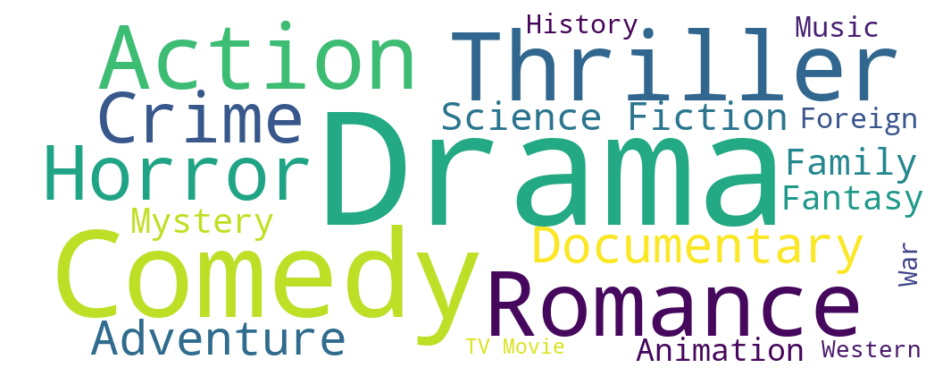

In [40]:
%matplotlib inline
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

genres_dict = dict()
for genres in genre_occurences.iteritems():
  if genres[1] > 1 :
    genres_dict[genres[0]] = genres[1]
  
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres_dict)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Rating per genre per year in the ratings dataset

In [0]:
movies_genre = movies_metadata[['id','genres']]
movies_genre = explode(movies_genre, ['genres'])

In [147]:
import time 
ratings_viz = ratings.copy()
ratings_viz['timestamp'] = ratings_viz['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x))) 
ratings_viz.head()

,userId,movieId,rating,timestamp
0,1,81834,5.0,2015
1,1,112552,5.0,2015
2,1,98809,0.5,2015
3,1,99114,4.0,2015
4,1,858,5.0,2015


In [148]:
ratings_viz = ratings_viz.merge(movies_genre, left_on='movieId', right_on='id', how='inner')
ratings_viz.head()

,userId,movieId,rating,timestamp,id,genres
0,1,858,5.0,2015,858.0,Drama
1,1,858,5.0,2015,858.0,Romance
2,1,858,5.0,2015,858.0,Comedy
3,3,858,4.0,2003,858.0,Drama
4,3,858,4.0,2003,858.0,Romance


In [149]:
aggrating = ratings_viz.groupby(['timestamp', 'genres'], as_index=False)['rating'].aggregate(np.mean)
aggrating.head() 

,timestamp,genres,rating
0,1995,Documentary,3.000000
1,1996,Action,3.580280
2,1996,Adventure,3.515263
3,1996,Animation,3.297509
4,1996,Comedy,3.529910


In [150]:
!pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/04/c2/e16037e4cc6bb9a6fb35eea102d7cffa06376fcd35e5523c880b64588778/plotly_express-0.4.0-py2.py3-none-any.whl


We can see the evolution of the average rating per year of each genre. 

The TV movie started very low and is now in the top 5 in 2017.

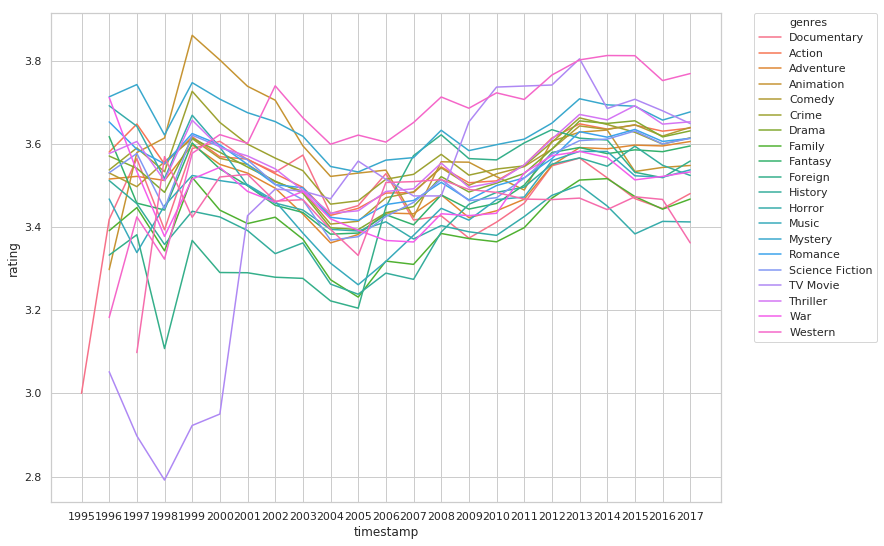

In [151]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("whitegrid")
sns
sns.lineplot(x="timestamp", y="rating", hue="genres",data=aggrating)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Data sampling

In [0]:
unique_users = ratings[['userId']].drop_duplicates()
unique_users_sample = unique_users.sample(frac=0.10)

In [121]:
ratings_sample = ratings[ratings['userId'].isin(unique_users_sample['userId'])]
ratings_sample.userId.unique().shape[0]

27090

In [122]:
movies_sample = movies_metadata[movies_metadata['id'].isin(ratings_sample['movieId'])]
movies_sample.id.unique().shape[0]

5560

## Splitting the data

In [69]:
from sklearn import model_selection as ms
train_data, test_data = ms.train_test_split(ratings_sample, test_size=0.2)
train_data.userId.unique().shape[0]

26948

In [70]:
ratings_sample

,userId,movieId,rating,timestamp
119,6,11,3.0,944894480
120,6,1198,3.0,944894480
121,6,2628,5.0,944928077
331,11,4238,3.5,1231674880
332,11,1370,3.5,1231677340
333,11,750,3.0,1231677212
334,11,784,2.0,1231677333
335,11,50601,2.5,1231678930
336,11,1276,3.0,1231675786
337,11,57353,3.5,1231675599


# Model

## Choosen algorithm : Surprise SVD

In [71]:
!pip install surprise


In [0]:
import surprise
from surprise import SVD, SVDpp
from surprise import Dataset, Reader, evaluate
from surprise.model_selection import cross_validate, GridSearchCV

In [0]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_sample[['userId', 'movieId', 'rating']], reader)

Using GridSearchCV took too much time to compute, i had to revert to directly fitting the model with default parameters

In [0]:
param_grid = {'lr_all':[0.005,0.007]}

gs = GridSearchCV(SVDpp,param_grid, measures=['RMSE'], cv = 2,n_jobs=-1,joblib_verbose=50)

In [51]:
#gs.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed: 19.9min remaining: 19.9min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 19.9min remaining:    0.0s


KeyboardInterrupt: ignored

In [0]:
data.split(n_folds=2)

svd = SVD()

In [76]:
evaluate(svd, data, measures=['RMSE'])

/usr/local/lib/python3.6/dist-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/usr/local/lib/python3.6/dist-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8771
------------
Fold 2
RMSE: 0.8759
------------
------------
Mean RMSE: 0.8765
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8770975446702595, 0.875869314510507]})

In [77]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [78]:
svd.predict(1, 302)

Prediction(uid=1, iid=302, r_ui=None, est=3.7606781528773547, details={'was_impossible': False})

In [79]:
svd.predict(1, 302).est

3.7606781528773547

In [80]:
evaluation_ratings_sample = evaluation_ratings[evaluation_ratings['userId'].isin(unique_users_sample['userId'])]
evaluation_ratings_sample = evaluation_ratings[evaluation_ratings['movieId'].isin(ratings_sample['movieId'])]
ratings_sample.userId.unique().shape[0]

27090

In [0]:
evaluation_ratings_sample.to_csv('result/evaluation_ratings_sample.csv', sep=';', encoding='utf-8-sig')

In [0]:
evaluation_ratings_est = evaluation_ratings_sample.copy()
evaluation_ratings_est['rating'] = evaluation_ratings_est.apply(lambda row : svd.predict(row['userId'],row['movieId']).est, axis=1)

In [83]:
evaluation_ratings_est

,userId,movieId,rating
0,1,110,4.087040
1,1,1968,3.849840
2,1,4878,4.025807
3,1,54503,3.742589
4,1,91542,3.749107
5,2,79,3.177159
6,2,141,3.471147
7,2,260,4.033920
8,2,1210,3.849447
9,3,1968,3.849840


In [0]:
evaluation_ratings_est.to_csv('result/evaluation_ratings_est.csv', sep=';', encoding='utf-8-sig')

### Bonus benchmark for surprise : 

Those tests sadly took too much time to compute on either google colab or in a jupyter notebook with a local machine

In [65]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    print(algorithm)
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   

KeyboardInterrupt: ignored

## Other models or methods that have been tried

### Tensorflow

In [0]:
ratings_df = ratings_sample.drop('timestamp', axis=1)

In [0]:
import tensorflow as tf
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.preprocessing import MinMaxScaler
r = ratings_df['rating'].values.astype(float)
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(r.reshape(-1,1))
df_normalized = pd.DataFrame(x_scaled)
ratings_df['rating'] = df_normalized

In [46]:
n_unique_users = ratings_df.userId.unique().shape[0]
n_unique_users

13545

In [47]:
n_unique_movie = ratings_df.movieId.unique().shape[0]
n_unique_movie

20422

In [0]:
matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating')
matrix.fillna(0, inplace=True)

In [49]:
users = matrix.index.tolist()
items = matrix.columns.tolist()

matrix = matrix.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
num_input = n_unique_movie
num_hidden_1 = 10
num_hidden_2 = 5

X = tf.placeholder(tf.float64, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1], dtype=tf.float64)),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2], dtype=tf.float64)),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input], dtype=tf.float64)),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'decoder_b2': tf.Variable(tf.random_normal([num_input], dtype=tf.float64)),
}

In [0]:
# Building the encoder

def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2


# Building the decoder

def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2


# Construct model

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)


# Prediction

y_pred = decoder_op


# Targets are the input data.

y_true = X

In [53]:
# Define loss and optimizer, minimize the squared error

loss = tf.losses.mean_squared_error(y_true, y_pred)
optimizer = tf.train.RMSPropOptimizer(0.03).minimize(loss)

predictions = pd.DataFrame()

# Define evaluation metrics

eval_x = tf.placeholder(tf.int32, )
eval_y = tf.placeholder(tf.int32, )
pre, pre_op = tf.metrics.precision(labels=eval_x, predictions=eval_y)

W0716 16:23:49.584942 140689896007552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 16:23:49.714000 140689896007552 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0716 16:23:49.912420 140689896007552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future 

In [0]:
# Initialize the variables (i.e. assign their default value)

init = tf.global_variables_initializer()
local_init = tf.local_variables_initializer()

In [0]:
with tf.Session() as session:
    epochs = 5
    batch_size = 250

    session.run(init)
    session.run(local_init)

    num_batches = int(matrix.shape[0] / batch_size)
    matrix = np.array_split(matrix, num_batches)

    for i in range(epochs):

        avg_cost = 0

        for batch in matrix:
            _, l = session.run([optimizer, loss], feed_dict={X: batch})
            avg_cost += l

        avg_cost /= num_batches

        print("Epoch: {} Loss: {}".format(i + 1, avg_cost))

    print("Predictions...")

    matrix = np.concatenate(matrix, axis=0)

    preds = session.run(decoder_op, feed_dict={X: matrix})

    predictions = predictions.append(pd.DataFrame(preds))

    predictions = predictions.stack().reset_index(name='rating')
    predictions.columns = ['user', 'item', 'rating']
    predictions['user'] = predictions['user'].map(lambda value: users[value])
    predictions['item'] = predictions['item'].map(lambda value: items[value])

Epoch: 1 Loss: 0.36070097651746535
Epoch: 2 Loss: 0.3551486294578623
Epoch: 3 Loss: 0.3065214852492015
Epoch: 4 Loss: 0.260313021088088
Epoch: 5 Loss: 0.1307588339679771
Predictions...


### Notation base recommandation

In [0]:
def charted_movies(dataframe):
    m = dataframe['vote_count'].quantile(0.8)
    C = dataframe['vote_average'].mean()
    charted_movies_df = dataframe[(dataframe['vote_count'] >= m) & 
               (dataframe['vote_count'].notnull()) & 
               (dataframe['vote_average'].notnull())]
    print(f"On {len(dataframe)} movies, only {len(charted_movies_df)} are qualified for the chart with at least {m} votes. The average rating is {C}/10")
    return charted_movies_df

In [0]:
charted_movies_df = charted_movies(movies_medata)
charted_movies_df.shape

On 45466 movies, only 9151 are qualified for the chart with at least 50.0 votes. The average rating is 5.618207215133889/10


(9151, 25)

In [0]:
charted_movies_df['weighted_rating'] = charted_movies_df.apply(lambda x: weighted_rating(x, charted_movies_df), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
charted_movies_df['weighted_rating'][:5]

0    7.451476
1    6.717594
2    6.370562
4    6.279648
5    7.170373
Name: weighted_rating, dtype: float64

In [0]:
charted_movies_df.sort_values('weighted_rating', ascending=False)[['genres','title','vote_average','vote_count','weighted_rating','popularity','release_date']].head(10)

,genres,title,vote_average,vote_count,weighted_rating,popularity,release_date
314,"[Drama, Crime]",The Shawshank Redemption,8.5,8358.0,8.224809,51.6454,1994-09-23
834,"[Drama, Crime]",The Godfather,8.5,6024.0,8.136314,41.1093,1972-03-14
12481,"[Drama, Action, Crime, Thriller]",The Dark Knight,8.3,12269.0,8.122792,123.167,2008-07-16
2843,[Drama],Fight Club,8.3,9678.0,8.080715,63.8696,1999-10-15
292,"[Thriller, Crime]",Pulp Fiction,8.3,8670.0,8.058397,140.95,1994-09-10
15480,"[Action, Thriller, Science Fiction, Mystery, A...",Inception,8.1,14075.0,7.959819,29.1081,2010-07-14
351,"[Comedy, Drama, Romance]",Forrest Gump,8.2,8147.0,7.958082,48.3072,1994-07-06
22879,"[Adventure, Drama, Science Fiction]",Interstellar,8.1,11187.0,7.927225,32.2135,2014-11-05
1154,"[Adventure, Action, Science Fiction]",The Empire Strikes Back,8.2,5998.0,7.886195,19.471,1980-05-17
522,"[Drama, History, War]",Schindler's List,8.3,4436.0,7.877983,41.7251,1993-11-29


It seems here that the popularity isn't correlated (or at least not only correlated) with the weighted rating

### Content based recommandation

### Using overview text

In [0]:
movies_medata['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
#We need to remove all the stopwords from the text and replace the empty overview with an empty string
tfidf = TfidfVectorizer(stop_words='english')
movies_medata['overview'] = movies_medata['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(movies_medata['overview'])

In [0]:
tfidf_matrix.shape

(45466, 75827)

We have around 76k different words to describe our movie

In [0]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies_medata.index, index=movies_medata['title']).drop_duplicates()
indices

title
Toy Story                               0
Jumanji                                 1
Grumpier Old Men                        2
Waiting to Exhale                       3
Father of the Bride Part II             4
Heat                                    5
Sabrina                                 6
Tom and Huck                            7
Sudden Death                            8
GoldenEye                               9
The American President                 10
Dracula: Dead and Loving It            11
Balto                                  12
Nixon                                  13
Cutthroat Island                       14
Casino                                 15
Sense and Sensibility                  16
Four Rooms                             17
Ace Ventura: When Nature Calls         18
Money Train                            19
Get Shorty                             20
Copycat                                21
Assassins                              22
Powder                      

In [0]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

### Using genres

In [0]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [30]:
movies_sample['genres'].astype('str')

0                        ['Animation', 'Comedy', 'Family']
1                       ['Adventure', 'Fantasy', 'Family']
5                 ['Action', 'Crime', 'Drama', 'Thriller']
9                      ['Adventure', 'Action', 'Thriller']
14                                 ['Action', 'Adventure']
15                                      ['Drama', 'Crime']
16                                    ['Drama', 'Romance']
17                                     ['Crime', 'Comedy']
20                         ['Comedy', 'Thriller', 'Crime']
21                                   ['Drama', 'Thriller']
24                                    ['Drama', 'Romance']
28             ['Fantasy', 'Science Fiction', 'Adventure']
31              ['Science Fiction', 'Thriller', 'Mystery']
35                                               ['Drama']
44              ['Fantasy', 'Drama', 'Comedy', 'Thriller']
46                        ['Crime', 'Mystery', 'Thriller']
48                                    ['Drama', 'Romance

In [31]:
from sklearn.feature_extraction.text import HashingVectorizer
tf = HashingVectorizer(analyzer='word',ngram_range=(1, 2), stop_words='english')
tfidf_matrix = tf.fit_transform(movies_sample['genres'].astype('str'))
tfidf_matrix.shape

(5793, 1048576)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
co = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
co_matrix = co.fit_transform(movies_sample['genres'].astype('str'))
co_matrix.shape

(5793, 319)

In [0]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.datasets import fetch_20newsgroups

batchsize = 1024
cosine_sim = []
for i in range(0, tfidf_matrix.shape[0], batchsize):
    cosine_sim.extend(linear_kernel(tfidf_matrix, tfidf_matrix[i:min(i+batchsize, tfidf_matrix.shape[0])]).flatten())
cosine_sim = np.array(cosine_sim)

#cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [0]:
cosine_sim = linear_kernel(co_matrix, co_matrix)

In [0]:
movies_sample = movies_sample.reset_index()
titles = movies_sample['title']
indices = pd.Series(movies_sample.index, index=movies_sample['title'])

In [36]:
get_recommendations('Pulp Fiction').head(10)

20         From Dusk Till Dawn
58                  Disclosure
75      Leon: The Professional
77                Pulp Fiction
113               The Fugitive
120             Judgment Night
141               True Romance
236    They Made Me a Criminal
285                      T-Men
333          Miller's Crossing
Name: title, dtype: object